In [1]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from matplotlib import rcParams

In [2]:
def rho_red_light(nx,rho_max,rho_in):
    rho = rho_max*numpy.ones(nx)
    rho[:int((nx-1)*3./4.)] = rho_in
    return rho

In [7]:
nx =81
nt=30
dx = 4.0/(nx-1)

rho_in = 5
rho_max = 10

u_max = 1

x = numpy.linspace(0,4,nx)
rho = rho_red_light(nx,rho_max,rho_in)

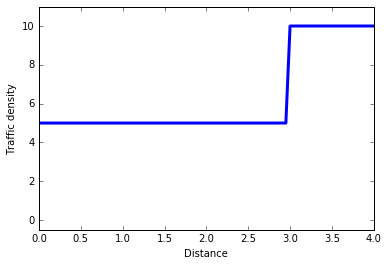

In [12]:
pyplot.plot(x,rho,lw =3)
pyplot.ylabel('Traffic density')
pyplot.xlabel('Distance')
pyplot.ylim(-0.5,11.);

In [14]:
def computeF(u_max,rho_max,rho):
    return u_max*rho*(1-rho/rho_max)